# <center> Project: **Análisis** de la relación entre los **Precios de Alquiler y la Seguridad Vial** en Barcelona (2017) por Jhonatan Barcos Gambaro

En primer lugar, importamos las librerías principales de Python necesarias para nuestro proyecto.

In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.animation as animation


#%matplotlib notebook
import matplotlib.cm as cm
import seaborn as sns
from matplotlib import pyplot
from mpl_toolkits import mplot3d
from scipy.stats import chi2_contingency
from sklearn.metrics import pairwise_distances_argmin
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.mixture import GaussianMixture
from matplotlib.patches import Ellipse

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from graphviz import Source
from sklearn import tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, auc, roc_curve, classification_report, confusion_matrix, precision_score, recall_score, precision_recall_curve


In [183]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [184]:
%cd "/content/drive/My Drive/J2D_Project"

/content/drive/My Drive/J2D_Project


#Step 1. Introducción



El análisis de datos desempeña un papel esencial en la toma de decisiones informadas y la generación de conocimiento valioso en una amplia variedad de campos. En este proyecto, abordaremos un desafío significativo: la unificación y análisis de dos conjuntos de datos en la ciudad de Barcelona. Estos datos abarcan información crucial sobre el mercado inmobiliario y seguridad vial en diferentes distritos y barrios de la ciudad. Nuestra misión es explorar y comprender las relaciones entre estos datos para obtener conocimientos que puedan influir en la planificación urbana, la seguridad pública y la calidad de vida en Barcelona.

#Step 2. Depuración de datos

##2.1. Nuestro dataset base: lloguer_dt

Realizamos la depuración de datos necesaria antes de unificar nuestros datasets

In [185]:
#Añadimos nuestro dataset base y lo visualizamos
lloguer_dt = pd.read_csv("2017_lloguer_preu_trim.csv", sep=",")
lloguer_dt.head()

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2017,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),734.99
1,2017,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),905.26
2,2017,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),722.78
3,2017,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),895.28
4,2017,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),871.08


In [186]:
#Accedemos a la información general del Dataset
lloguer_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Any             584 non-null    int64  
 1   Trimestre       584 non-null    int64  
 2   Codi_Districte  584 non-null    int64  
 3   Nom_Districte   584 non-null    object 
 4   Codi_Barri      584 non-null    int64  
 5   Nom_Barri       584 non-null    object 
 6   Lloguer_mitja   584 non-null    object 
 7   Preu            546 non-null    float64
dtypes: float64(1), int64(4), object(3)
memory usage: 36.6+ KB


In [187]:
#Observemos de manera precisa el número de elementos nulos en cada variable
lloguer_dt.isna().sum()

Any                0
Trimestre          0
Codi_Districte     0
Nom_Districte      0
Codi_Barri         0
Nom_Barri          0
Lloguer_mitja      0
Preu              38
dtype: int64

In [188]:
#Descartamos los elementos nulos de nuestro dataset base
lloguer_dt.dropna(axis=0, inplace=True)

In [189]:
#Elaboramos una función auxiliar para dividir la variable 'Preu' según la medida dada por 'Lloguer_mitja'
def dividir_precio(df):
    #Crear una nueva columna "Pru_mes" y una columna "Preu_m2" con valores iniciales en NaN
    df['Preu_mes'] = None
    df['Preu_m2'] = None

    #Iterar a través de las filas del DataFrame
    for index, row in df.iterrows():
        preu = row['Preu']
        ind = row['Lloguer_mitja']
        if "Lloguer mitjà mensual (Euros/mes)" in ind:
            df.at[index, 'Preu_mes'] = preu
        elif "Lloguer mitjà per superfície (Euros/m2 mes)" in ind:
            df.at[index, 'Preu_m2'] = preu

    #Eliminar la columna original "Preu"
    df.drop('Preu', axis=1, inplace=True)

    #Eliminar la columna original "Lloguer_mitja"
    df.drop('Lloguer_mitja', axis=1, inplace=True)


In [190]:
dividir_precio(lloguer_dt)
lloguer_dt

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Preu_mes,Preu_m2
0,2017,1,1,Ciutat Vella,1,el Raval,734.99,None
1,2017,1,1,Ciutat Vella,2,el Barri Gòtic,905.26,None
2,2017,1,1,Ciutat Vella,3,la Barceloneta,722.78,None
3,2017,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",895.28,None
4,2017,1,2,Eixample,5,el Fort Pienc,871.08,None
...,...,...,...,...,...,...,...,...
579,2017,4,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,None,16.51
580,2017,4,10,Sant Martí,70,el Besòs i el Maresme,None,10.4
581,2017,4,10,Sant Martí,71,Provençals del Poblenou,None,12.66
582,2017,4,10,Sant Martí,72,Sant Martí de Provençals,None,10.83


In [191]:
#Identificar la mitad del dataset donde "Preu_mes" está vacío y "Preu_m2" tiene valores
lloguer_mes_dt = lloguer_dt[lloguer_dt['Preu_mes'].notna() & lloguer_dt['Preu_m2'].isna()]
lloguer_mes_dt.dropna(axis=1, inplace=True)

#Identificar la mitad del dataset donde "Preu_m2" está vacío y "Preu_mes" tiene valores
lloguer_m2_dt = lloguer_dt[lloguer_dt['Preu_mes'].isna() & lloguer_dt['Preu_m2'].notna()]
lloguer_m2_dt.dropna(axis=1, inplace=True)

#Combinar ambas partes en el dataset base
lloguer_dt = pd.merge(lloguer_mes_dt,lloguer_m2_dt, how='outer')

<ipython-input-191-a878c625f1f8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloguer_mes_dt.dropna(axis=1, inplace=True)
<ipython-input-191-a878c625f1f8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloguer_m2_dt.dropna(axis=1, inplace=True)


In [192]:
#Casteamos las variables Preu_mes y Preu_m2 a floats
lloguer_dt['Preu_m2'] = pd.to_numeric(lloguer_dt['Preu_m2'], errors='coerce')
lloguer_dt['Preu_mes'] = pd.to_numeric(lloguer_dt['Preu_mes'], errors='coerce')

In [193]:
lloguer_dt

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Preu_mes,Preu_m2
0,2017,1,1,Ciutat Vella,1,el Raval,734.99,13.50
1,2017,1,1,Ciutat Vella,2,el Barri Gòtic,905.26,14.14
2,2017,1,1,Ciutat Vella,3,la Barceloneta,722.78,19.46
3,2017,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",895.28,15.01
4,2017,1,2,Eixample,5,el Fort Pienc,871.08,12.77
...,...,...,...,...,...,...,...,...
268,2017,4,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,1233.01,16.51
269,2017,4,10,Sant Martí,70,el Besòs i el Maresme,621.32,10.40
270,2017,4,10,Sant Martí,71,Provençals del Poblenou,864.09,12.66
271,2017,4,10,Sant Martí,72,Sant Martí de Provençals,790.58,10.83


##2.1.2. Nuestro dataset complementario: accidents_dt

Realizamos la depuración de datos necesaria antes de unificar nuestros datasets

In [194]:
#Añadimos nuestro dataset base y lo visualizamos
accidents_dt = pd.read_csv("2017_accidents_causa_conductor_gu_bcn_.csv", sep=",")
accidents_dt.head()

,Numero_expedient,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Codi_carrer,Nom_carrer,Num_postal,Descripcio_dia_setmana,NK_Any,Mes_any,Nom_mes,Dia_mes,Hora_dia,Descripcio_torn,Descripcio_causa_conductor,Coordenada_UTM_X_ED50,Coordenada_UTM_Y_ED50,Longitud,Latitud
0,2017S004939,-1,Desconegut,-1,Desconegut,-1,Motors ...,43-51,Dimarts,2017,6,Juny,6,8,Desobeir altres senyals,Matí,427585.89,4577869.16,2.191767,41.411606
1,2017S007937,-1,Desconegut,-1,Desconegut,-1,Joan XXIII / Martí i Franquès ...,NaN,Dimarts,2017,9,Setembre,26,9,Gir indegut o sense precaució,Matí,426505.49,4581655.96,2.199239,41.419635
2,2017S004739,-1,Desconegut,-1,Desconegut,-1,Corts Catalanes ...,900,Dilluns,2017,5,Maig,29,22,Manca d'atenció a la conducció,Nit,432587.59,4584475.05,2.186875,41.412198
3,2017S008779,-1,Desconegut,-1,Desconegut,-1,Número 6 Zona Franca / A Zona Franca ...,NaN,Dilluns,2017,10,Octubre,23,22,Desobeir altres senyals,Nit,427519.99,4575229.36,2.190955,41.406769
4,2017S004350,-1,Desconegut,-1,Desconegut,-1,Aguilar ...,7-9,Dimarts,2017,5,Maig,16,14,Altres,Tarda,430758.19,4586316.94,2.186557,41.409004


In [195]:
#Accedemos a la información general del Dataset
accidents_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11091 entries, 0 to 11090
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Numero_expedient            11091 non-null  object 
 1   Codi_districte              11091 non-null  int64  
 2   Nom_districte               11091 non-null  object 
 3   Codi_barri                  11091 non-null  int64  
 4   Nom_barri                   11091 non-null  object 
 5   Codi_carrer                 11091 non-null  int64  
 6   Nom_carrer                  11091 non-null  object 
 7   Num_postal                  11089 non-null  object 
 8   Descripcio_dia_setmana      11091 non-null  object 
 9   NK_Any                      11091 non-null  int64  
 10  Mes_any                     11091 non-null  int64  
 11  Nom_mes                     11091 non-null  object 
 12  Dia_mes                     11091 non-null  int64  
 13  Hora_dia                    110

In [196]:
#Observemos de manera precisa el número de elementos nulos en cada variable
accidents_dt.isna().sum()

Numero_expedient              0
Codi_districte                0
Nom_districte                 0
Codi_barri                    0
Nom_barri                     0
Codi_carrer                   0
Nom_carrer                    0
Num_postal                    2
Descripcio_dia_setmana        0
NK_Any                        0
Mes_any                       0
Nom_mes                       0
Dia_mes                       0
Hora_dia                      0
Descripcio_torn               0
Descripcio_causa_conductor    0
Coordenada_UTM_X_ED50         0
Coordenada_UTM_Y_ED50         0
Longitud                      0
Latitud                       0
dtype: int64

In [197]:
accidents_dt.dropna(axis=0, inplace=True)
accidents_dt = accidents_dt[accidents_dt['Codi_districte'] != -1]

In [198]:
accidents_dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10987 entries, 11 to 11090
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Numero_expedient            10987 non-null  object 
 1   Codi_districte              10987 non-null  int64  
 2   Nom_districte               10987 non-null  object 
 3   Codi_barri                  10987 non-null  int64  
 4   Nom_barri                   10987 non-null  object 
 5   Codi_carrer                 10987 non-null  int64  
 6   Nom_carrer                  10987 non-null  object 
 7   Num_postal                  10987 non-null  object 
 8   Descripcio_dia_setmana      10987 non-null  object 
 9   NK_Any                      10987 non-null  int64  
 10  Mes_any                     10987 non-null  int64  
 11  Nom_mes                     10987 non-null  object 
 12  Dia_mes                     10987 non-null  int64  
 13  Hora_dia                    10

In [199]:
#Creamos función auxiliar para convertir nº mes en nº trimestre
def mesToTrimestre(mes):
  if (mes <=3):
    return 1
  if (3<mes<=6):
    return 2
  if (6<mes<=9):
    return 3
  if (9<mes<=12):
    return 4

In [200]:
#Añadimos columna 'Trimestre' en función de mes del año en el que haya sucedido el siniestro
accidents_dt['Trimestre'] = accidents_dt['Mes_any'].apply(mesToTrimestre)

In [201]:
#Renombrar columnas con nombre incorrectos
accidents_dt.rename(columns={'Descripcio_causa_conductor':'Descripcio_turn', 'Descripcio_torn':'Descripcio_causa_conductor'}, inplace=True)
accidents_dt.rename(columns={'NK_Any':'Any','Codi_districte':'Codi_Districte', 'Nom_districte':'Nom_Districte', 'Codi_barri': 'Codi_Barri', 'Nom_barri': 'Nom_Barri'}, inplace=True)

In [202]:
accidents_dt.head()

,Numero_expedient,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Codi_carrer,Nom_carrer,Num_postal,Descripcio_dia_setmana,Any,...,Nom_mes,Dia_mes,Hora_dia,Descripcio_causa_conductor,Descripcio_turn,Coordenada_UTM_X_ED50,Coordenada_UTM_Y_ED50,Longitud,Latitud,Trimestre
11,2017S010628,10,Sant Martí,64,el Camp de l'Arpa del Clot,226400,Las Navas de Tolosa,0293 0293,Diumenge,2017,...,Desembre,24,0,Gir indegut o sense precaució,Nit,432141.03,4585382.64,2.190956,41.409311,4
12,2017S003663,10,Sant Martí,64,el Camp de l'Arpa del Clot,226400,Las Navas de Tolosa,0323 0325,Dilluns,2017,...,Abril,24,21,Desobeir semàfor,Tarda,432024.02,4585501.49,2.196339,41.413514,2
13,2017S010680,10,Sant Martí,64,el Camp de l'Arpa del Clot,161407,Indústria,0303 0303,Dimarts,2017,...,Desembre,26,20,No determinada,Tarda,431863.93,4585505.67,2.187887,41.414538,4
14,2017S003193,10,Sant Martí,64,el Camp de l'Arpa del Clot,194406,Maragall,0052 0054,Dijous,2017,...,Abril,6,14,Desconegut,Tarda,431629.04,4585416.36,2.195267,41.416687,2
15,2017S008857,10,Sant Martí,64,el Camp de l'Arpa del Clot,297001,Sant Antoni Maria Claret,0248 0250,Dijous,2017,...,Octubre,26,9,Desobeir semàfor,Matí,431181.73,4585030.22,2.191832,41.409389,4


In [203]:
# Agrupar accidentes por trimestre y barrio y contar el número de accidentes en cada grupo
accidents_trim = accidents_dt.groupby(['Trimestre','Nom_Barri']).size().reset_index(name='Accidents_trim')

In [204]:
accidents_dt = pd.merge(accidents_dt, accidents_trim, on=['Trimestre', 'Nom_Barri'])

In [205]:
# Agrupar por año, mes, barrio, causa y contar el número de accidentes de la misma causa
resumen_accidentes = accidents_dt.groupby(['Any', 'Trimestre', 'Nom_Districte', 'Nom_Barri', 'Descripcio_causa_conductor', 'Accidents_trim'])['Numero_expedient'].count().reset_index()

# Renombrar la columna de recuento
resumen_accidentes = resumen_accidentes.rename(columns={'Numero_expedient': 'Accidents_causa_trim'})

# Seleccionar una fila por año, mes, barrio y causa (por ejemplo, la primera fila)
resultado_final = resumen_accidentes.drop_duplicates(subset=['Any', 'Trimestre', 'Nom_Barri', 'Descripcio_causa_conductor'], keep='first')

# Reiniciar el índice si es necesario
accidents_dt = resultado_final.reset_index(drop=True)


In [206]:
accidents_dt.head(15)

,Any,Trimestre,Nom_Districte,Nom_Barri,Descripcio_causa_conductor,Accidents_trim,Accidents_causa_trim
0,2017,1,Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera",Altres,52,2
1,2017,1,Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera",Avançament defectuós/improcedent,52,3
2,2017,1,Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera",Canvi de carril sense precaució,52,2
3,2017,1,Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera",Desconegut,52,5
4,2017,1,Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera",Desobeir altres senyals,52,1
5,2017,1,Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera",Desobeir semàfor,52,4
6,2017,1,Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera",Gir indegut o sense precaució,52,7
7,2017,1,Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera",Manca d'atenció a la conducció,52,12
8,2017,1,Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera",Manca precaució efectuar marxa enrera,52,1
9,2017,1,Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera",Manca precaució incorporació circulació,52,4


##2.2. Creamos un nuevo dataset unificado: merged_dt

In [207]:
#Unificamos nuestros datasets una vez hemos realizado la depuración de datos correspondiente
merged_dt = pd.merge(lloguer_dt, accidents_dt, on=['Any','Trimestre', 'Nom_Districte', 'Nom_Barri'])
merged_dt.head()

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Preu_mes,Preu_m2,Descripcio_causa_conductor,Accidents_trim,Accidents_causa_trim
0,2017,1,1,Ciutat Vella,1,el Raval,734.99,13.5,Altres,63,12
1,2017,1,1,Ciutat Vella,1,el Raval,734.99,13.5,Avançament defectuós/improcedent,63,4
2,2017,1,1,Ciutat Vella,1,el Raval,734.99,13.5,Canvi de carril sense precaució,63,1
3,2017,1,1,Ciutat Vella,1,el Raval,734.99,13.5,Desconegut,63,3
4,2017,1,1,Ciutat Vella,1,el Raval,734.99,13.5,Desobeir altres senyals,63,2


In [208]:
#Reordena las columnas
new_order = ['Any', 'Trimestre', 'Codi_Districte', 'Nom_Districte', 'Codi_Barri','Nom_Barri', 'Descripcio_causa_conductor', 'Accidents_causa_trim', 'Accidents_trim', 'Preu_mes', 'Preu_m2']
merged_dt = merged_dt[new_order]


In [209]:
merged_dt.head(15)

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Descripcio_causa_conductor,Accidents_causa_trim,Accidents_trim,Preu_mes,Preu_m2
0,2017,1,1,Ciutat Vella,1,el Raval,Altres,12,63,734.99,13.50
1,2017,1,1,Ciutat Vella,1,el Raval,Avançament defectuós/improcedent,4,63,734.99,13.50
2,2017,1,1,Ciutat Vella,1,el Raval,Canvi de carril sense precaució,1,63,734.99,13.50
3,2017,1,1,Ciutat Vella,1,el Raval,Desconegut,3,63,734.99,13.50
4,2017,1,1,Ciutat Vella,1,el Raval,Desobeir altres senyals,2,63,734.99,13.50
5,2017,1,1,Ciutat Vella,1,el Raval,Desobeir semàfor,2,63,734.99,13.50
6,2017,1,1,Ciutat Vella,1,el Raval,Gir indegut o sense precaució,3,63,734.99,13.50
7,2017,1,1,Ciutat Vella,1,el Raval,Manca d'atenció a la conducció,13,63,734.99,13.50
8,2017,1,1,Ciutat Vella,1,el Raval,Manca precaució efectuar marxa enrera,2,63,734.99,13.50
9,2017,1,1,Ciutat Vella,1,el Raval,No cedir la dreta,1,63,734.99,13.50


#Step 3. Resultados e interpretación

A continuación realizaremos una serie de análisis a las variables más relevantes del dataset total así como exploraremos la correlación existente entre éstas. Por último seleccionaremos una muestra de dicho conjunto de datos y la analizaremos a fondo con tal de poder sacar las conclusiones necesarias para nuestro proyecto.

##3.1. Análisis del dataset unificado

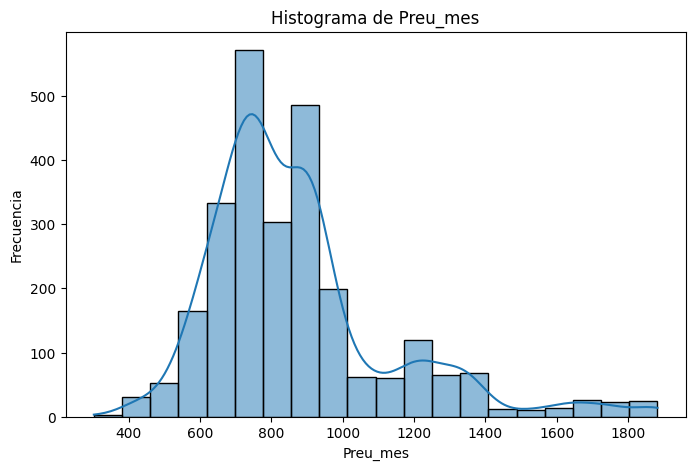

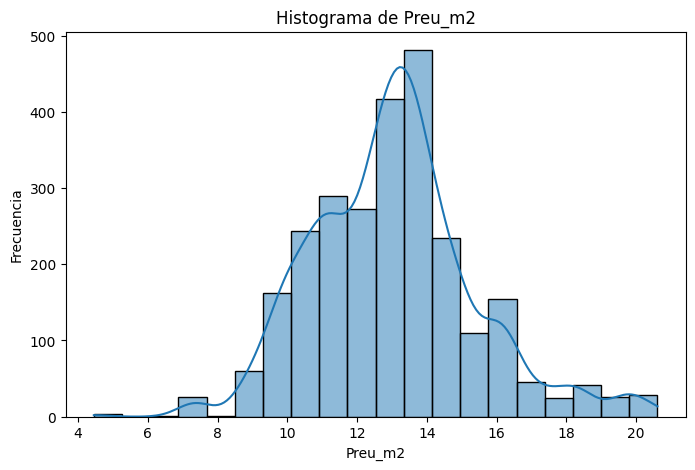

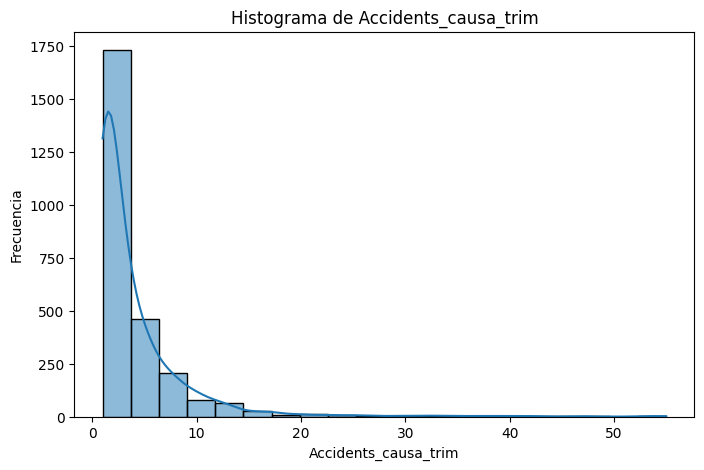

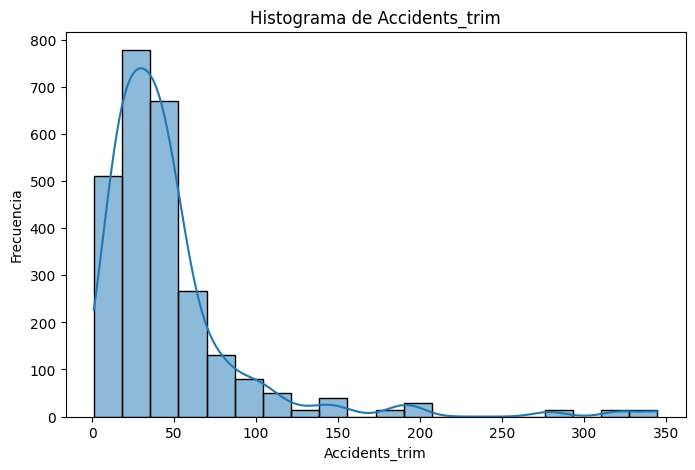

In [210]:
#Restringimos el Dataset a variables numéricas
merged_num_dt = merged_dt[['Preu_mes', 'Preu_m2', 'Accidents_causa_trim', 'Accidents_trim']]

#Lista de variables numéricas a analizar
numeric_variables = ['Preu_mes', 'Preu_m2', 'Accidents_causa_trim', 'Accidents_trim']

#Creamos histogramas iterando utilizando Seaborn
for variable in numeric_variables:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=merged_dt, x=variable, kde=True, bins=20)
    plt.title(f'Histograma de {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frecuencia')
    plt.show()

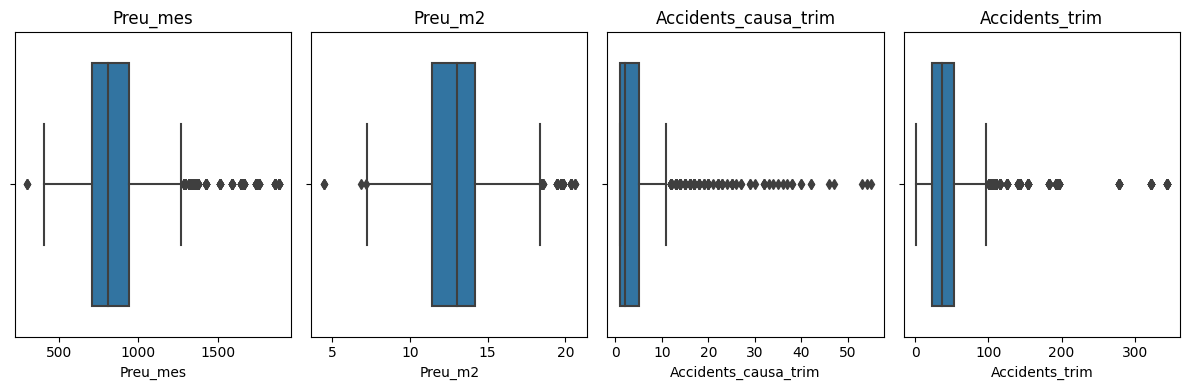

In [211]:
#Creamos los siguientes box plots
fig, axes = plt.subplots(nrows=1, ncols=len(numeric_variables), figsize=(12, 4))

for i, column in enumerate(numeric_variables):
    sns.boxplot(x=merged_dt[column], ax=axes[i])
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

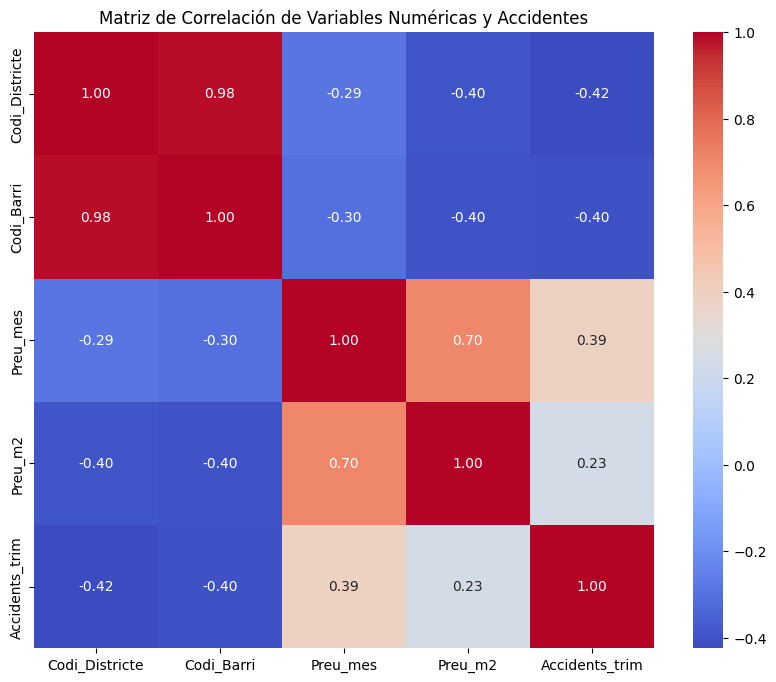

In [212]:
#Variables a incluir en la matriz de correlación
variables_to_correlate = ['Codi_Districte', 'Codi_Barri','Preu_mes', 'Preu_m2', 'Accidents_trim']

#Subconjunto de DataFrame con las variables seleccionadas
selected_data = merged_dt[variables_to_correlate]

#Calcular la matriz de correlación
correlation_matrix = selected_data.corr()

#Crear un mapa de calor (heatmap) de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Variables Numéricas y Accidentes')
plt.show()


A través del análisis de la matriz de correlación observamos lo siguiente:  

*  Los precios/mes y precios/m2 están altamente correlacionados positivamente entre sí por lo que si una de éstas variables aumenta, la otra también tenderá a ello.
*   Los precios/mes y accidentes/trimestre estan correlacionados positivamente de manera significativa. Éste hecho será clave para nuestro estudio.



#3.2.  Análisis de los datos de una muestra

In [213]:
#Tomamos una muestra aleatoria del 30% de los datos
sample_dt = merged_dt.sample(frac=0.30, random_state=42)
sample_dt = sample_dt.reset_index(drop = True)

sample_dt.head()

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Descripcio_causa_conductor,Accidents_causa_trim,Accidents_trim,Preu_mes,Preu_m2
0,2017,1,5,Sarrià-Sant Gervasi,24,les Tres Torres,Manca d'atenció a la conducció,4,34,1516.52,16.12
1,2017,3,10,Sant Martí,71,Provençals del Poblenou,Desobeir semàfor,13,44,933.90,12.64
2,2017,2,10,Sant Martí,70,el Besòs i el Maresme,Gir indegut o sense precaució,3,32,606.61,9.92
3,2017,1,8,Nou Barris,48,la Guineueta,Altres,3,7,634.54,9.13
4,2017,4,6,Gràcia,31,la Vila de Gràcia,No determinada,4,49,879.85,15.07


A continuación, crearemos distintos scatter plots y bar plots con fin de visualizar cómo se relacionan los datos entre sí

##3.2.1. Scatter plot: Precio de Alquiler Mensual vs Precio por Metro Cuadrado

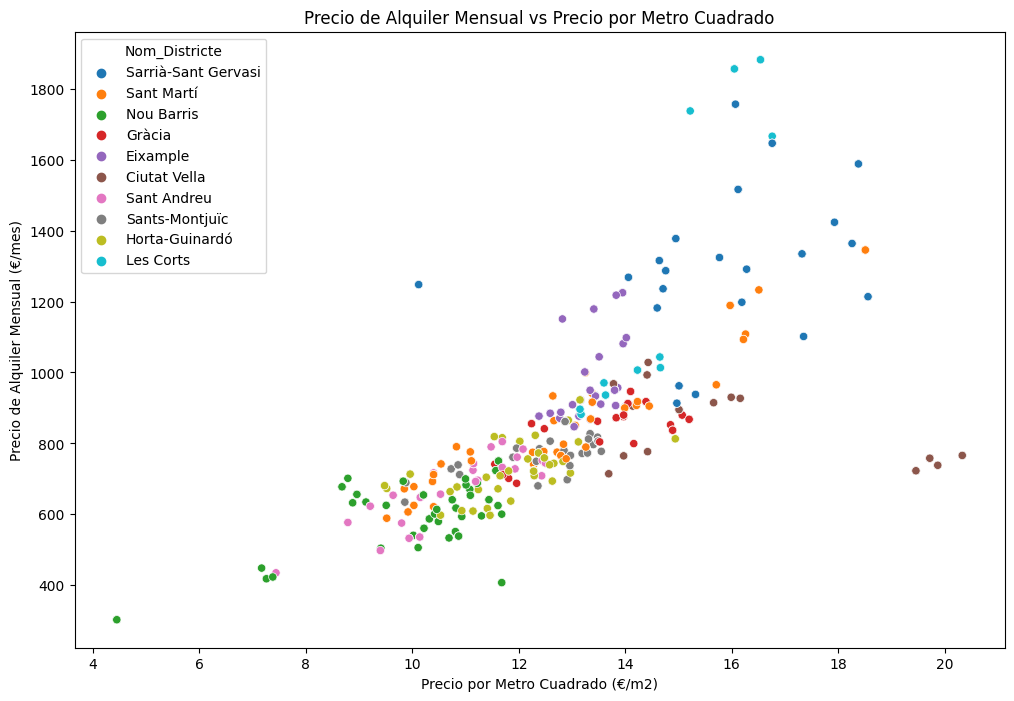

In [214]:
#Scatter plot: Precio de Alquiler Mensual vs Precio por Metro Cuadrado
plt.figure(figsize=(12, 8))
sns.scatterplot(data=sample_dt, x='Preu_m2', y='Preu_mes', hue='Nom_Districte')
plt.title('Precio de Alquiler Mensual vs Precio por Metro Cuadrado')
plt.xlabel('Precio por Metro Cuadrado (€/m2)')
plt.ylabel('Precio de Alquiler Mensual (€/mes)')
plt.show()

**Observaciones específicas**

*   Sarrià-Sant Gervasi, seguido de Les Corts, Eixample y Sant Marti son los distritos con mayor precio de alquiler mensual y por metro cuadrado.
* Nou Barris y Sant Andreu son los distritos con menor precio de renta mensual y por metro cuadrado.

**Observaciones generales**

*   El precio de alquiler mensual y el precio por metro cuadrado esta correlacionado positivamente, es decir, por norma general si el precio de alquiler mensual aumenta, el precio por metro cuadrado tenderá a aumentar.

##3.2.2. Scatter plot: Precio de Alquiler Mensual vs Accidentes de Tráfico

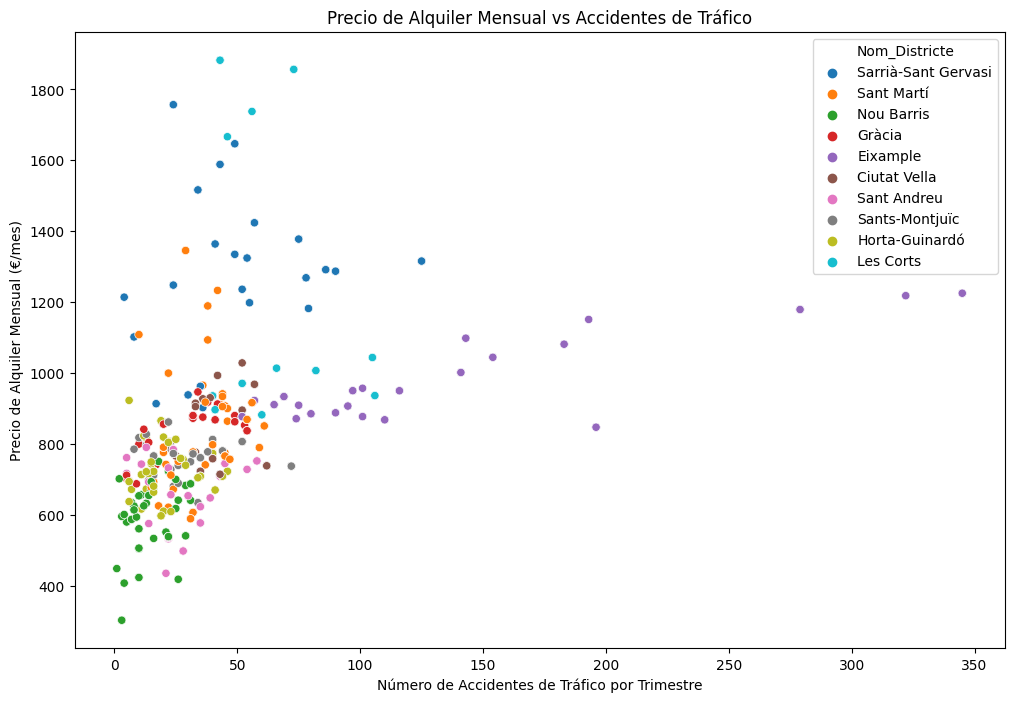

In [215]:
# Scatter plot: Precio de Alquiler Mensual vs Accidentes de Tráfico
plt.figure(figsize=(12, 8))
sns.scatterplot(data=sample_dt, x='Accidents_trim', y='Preu_mes', hue='Nom_Districte')
plt.title('Precio de Alquiler Mensual vs Accidentes de Tráfico')
plt.xlabel('Número de Accidentes de Tráfico por Trimestre')
plt.ylabel('Precio de Alquiler Mensual (€/mes)')
plt.show()

**Observaciones específicas**

*   Eixample es el distrito con mayor nº de accidentes el cual tiene un precio de reta mensual por encima de la media.
*   Sarrià-Sant Gervasi junto a Les Corts son los distritos con mayor nº de accidentes los cuales además son los segundos distritos con mayor precio de renta mensual.
*   Nou Barris es el distrito con menos nº de accidentes el cual además tiene el menor precio medio de renta mensual.

**Observaciones generales**

* Distritos con un mayor precio de renta mensual tienden a un gran nº de accidentes por barrio.
* Distritos con menor precio de renta mensual tienden a un menor nº de accidentes por barrio pero con una mayor densidad.

##3.2.3. Bar Plot: Causas de Accidentes de Tráfico

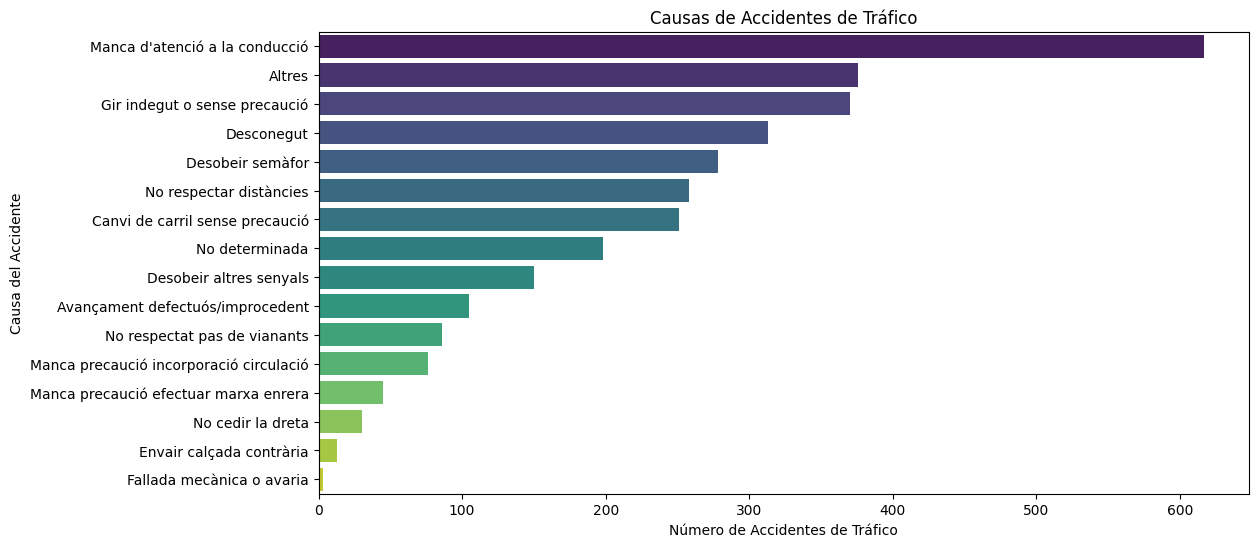

In [216]:
#Bar Plot: Causas de Accidentes de Tráfico
#Agrupamos y sumamos los accidentes por causa de los accidentes
causas_totales = sample_dt.groupby('Descripcio_causa_conductor')['Accidents_causa_trim'].sum().reset_index()

#Ordenamos las causas de mayor a menor frecuencia
causas_totales = causas_totales.sort_values(by='Accidents_causa_trim', ascending=False)

#Creamos un gráfico de barras para visualizar las causas de los accidentes
plt.figure(figsize=(12, 6))
sns.barplot(data=causas_totales, x='Accidents_causa_trim', y='Descripcio_causa_conductor', palette='viridis')
plt.title('Causas de Accidentes de Tráfico')
plt.xlabel('Número de Accidentes de Tráfico')
plt.ylabel('Causa del Accidente')
plt.show()


**Observaciones generales**

* Las causas principales son: falta de atención, giro indebido o desobedecer semáforo.
* Las causas menos comunes son: avería mecánica, envadir acera contraria o no ceder la calle.

##3.2.4. Descomposición en componentes principales (PCA)

Finalmente, realizaremos una descomposición en componentes principales para reducir la dimensionalidad de nuestro dataset

In [217]:
from sklearn.decomposition import PCA

# 1. Preparación de datos
# Selecciona las variables más relevantes y guárdalas en un nuevo DataFrame
relevant_features = [ 'Preu_mes','Preu_m2', 'Accidents_trim']
data = merged_dt[relevant_features]

# 2. Estandarización de datos
# Es una buena práctica estandarizar las variables antes de aplicar PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# 3. Aplicación de PCA
pca = PCA(n_components=2)  # Especifica el número de componentes principales deseados
principal_components = pca.fit_transform(scaled_data)

# 4. Análisis de componentes principales
explained_variance = pca.explained_variance_ratio_
print("Varianza explicada por cada componente principal:", explained_variance)

# 5. Creación de un DataFrame con los componentes principales
pca_df = pd.DataFrame(data=principal_components, columns=['PCA1', 'PCA2'])


Varianza explicada por cada componente principal: [0.63912308 0.26903969]


A través del análisis de dicha tabla podemos ver la varianza explicada por las 2 componentes principales y la varianza explicada acumulada. El primer componente principal explica un 63.91% de la varianza total de los datos originales mientras que el segundo un 26.90%. Conjuntamente, los 2 componentes principales explican en torno a un 90.81% de la variación total.

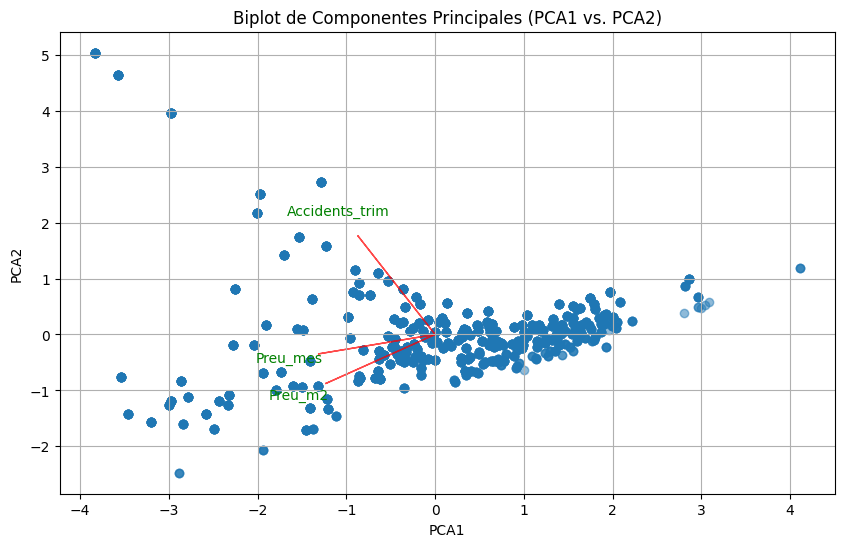

In [218]:
#Crear un gráfico biplot
def biplot(score, coeff, labels=None):
    plt.figure(figsize=(10, 6))
    plt.scatter(score[:,0], score[:,1], alpha=0.5)

    for i in range(coeff.shape[0]):
        plt.arrow(0, 0, coeff[i,0]*2, coeff[i,1]*2, color='r', alpha=0.7)
        if labels is None:
            plt.text(coeff[i,0]*2.5, coeff[i,1]*2.5, "Var"+str(i+1), color='g', ha='center', va='center')
        else:
            plt.text(coeff[i,0]*2.5, coeff[i,1]*2.5, labels[i], color='g', ha='center', va='center')

    plt.xlabel('PCA1')
    plt.ylabel('PCA2')
    plt.title('Biplot de Componentes Principales (PCA1 vs. PCA2)')
    plt.grid()
    plt.show()

biplot(principal_components, pca.components_.T, labels=relevant_features)


A través del análisis de la visualización de la dispersión del PCA podemos observar como las variables Preu_mes y Preu_m2 se encuentran muy correlacionadas. Así como las variables Preu_mes y Accidents_trim se encuentran correlacionadas significativamente pero no en exceso.